In [ ]:
pip install yfinance ta-lib

In [1]:
import yfinance as yf
import talib

# Fetch AAPL stock data
df = yf.download("AAPL", start="2010-01-01", end="2024-01-01", interval="1d")
df.isna().sum()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [2]:
df["CDLDOJI"] = talib.CDLDOJI(df["Open"].values.flatten(), df["High"].values.flatten(), df["Low"].values.flatten(), df["Close"].values.flatten())
df["CDLHAMMER"] = talib.CDLHAMMER(df["Open"].values.flatten(), df["High"].values.flatten(), df["Low"].values.flatten(), df["Close"].values.flatten())
df["CDLSHOOTINGSTAR"] = talib.CDLSHOOTINGSTAR(df["Open"].values.flatten(), df["High"].values.flatten(), df["Low"].values.flatten(), df["Close"].values.flatten())
df["CDLMORNINGSTAR"] = talib.CDLMORNINGSTAR(df["Open"].values.flatten(), df["High"].values.flatten(), df["Low"].values.flatten(), df["Close"].values.flatten())
df["CDLEVENINGSTAR"] = talib.CDLEVENINGSTAR(df["Open"].values.flatten(), df["High"].values.flatten(), df["Low"].values.flatten(), df["Close"].values.flatten())
df["CDLENGULFING"] = talib.CDLENGULFING(df["Open"].values.flatten(), df["High"].values.flatten(), df["Low"].values.flatten(), df["Close"].values.flatten())

# Convert 100s to 1s for the patterns (0 remains 0)
df["CDLDOJI"] = df["CDLDOJI"].replace({100: 1, -100: -1})
df["CDLHAMMER"] = df["CDLHAMMER"].replace({100: 1, -100: -1})
df["CDLSHOOTINGSTAR"] = df["CDLSHOOTINGSTAR"].replace({100: 1, -100: -1})
df["CDLMORNINGSTAR"] = df["CDLMORNINGSTAR"].replace({100: 1, -100: -1})
df["CDLEVENINGSTAR"] = df["CDLEVENINGSTAR"].replace({100: 1, -100: -1})
df["CDLENGULFING"] = df["CDLENGULFING"].replace({100: 1, -100: -1})

# For the previous 3 days (shifting the results)
df["CDLDOJI_1"] = df["CDLDOJI"].shift(1)
df["CDLDOJI_2"] = df["CDLDOJI"].shift(2)
df["CDLDOJI_3"] = df["CDLDOJI"].shift(3)

df["CDLHAMMER_1"] = df["CDLHAMMER"].shift(1)
df["CDLHAMMER_2"] = df["CDLHAMMER"].shift(2)
df["CDLHAMMER_3"] = df["CDLHAMMER"].shift(3)

df["CDLSHOOTINGSTAR_1"] = df["CDLSHOOTINGSTAR"].shift(1)
df["CDLSHOOTINGSTAR_2"] = df["CDLSHOOTINGSTAR"].shift(2)
df["CDLSHOOTINGSTAR_3"] = df["CDLSHOOTINGSTAR"].shift(3)

df["CDLMORNINGSTAR_1"] = df["CDLMORNINGSTAR"].shift(1)
df["CDLMORNINGSTAR_2"] = df["CDLMORNINGSTAR"].shift(2)
df["CDLMORNINGSTAR_3"] = df["CDLMORNINGSTAR"].shift(3)

df["CDLEVENINGSTAR_1"] = df["CDLEVENINGSTAR"].shift(1)
df["CDLEVENINGSTAR_2"] = df["CDLEVENINGSTAR"].shift(2)
df["CDLEVENINGSTAR_3"] = df["CDLEVENINGSTAR"].shift(3)

df["CDLENGULFING_1"] = df["CDLENGULFING"].shift(1)
df["CDLENGULFING_2"] = df["CDLENGULFING"].shift(2)
df["CDLENGULFING_3"] = df["CDLENGULFING"].shift(3)


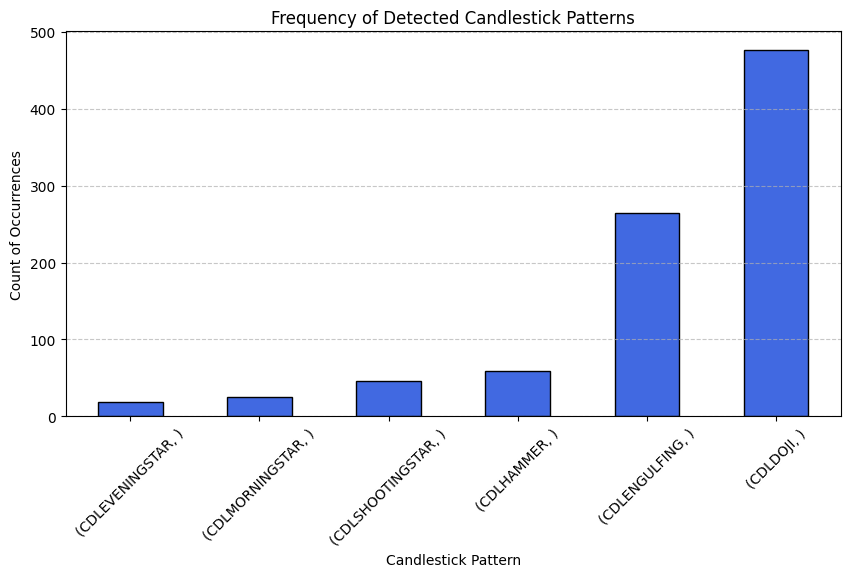

In [16]:
import matplotlib.pyplot as plt

# Select only the candlestick pattern columns
candlestick_columns = [
    "CDLDOJI", "CDLHAMMER", "CDLSHOOTINGSTAR", 
    "CDLMORNINGSTAR", "CDLEVENINGSTAR", "CDLENGULFING"
]

# Count occurrences of each pattern
pattern_counts = df[candlestick_columns].apply(lambda x: (x != 0).sum())

# Plot the pattern occurrences
plt.figure(figsize=(10, 5))
pattern_counts.sort_values().plot(kind='bar', color='royalblue', edgecolor='black')

plt.xlabel("Candlestick Pattern")
plt.ylabel("Count of Occurrences")
plt.title("Frequency of Detected Candlestick Patterns")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()

In [3]:
df["Close"].shape

# Compute technical indicators

# Relative Strength Index (RSI)
df["RSI"] = talib.RSI(df["Close"].values.flatten(), timeperiod=3)
# Moving Average Convergence Divergence (MACD)
df["MACD"], df["MACD_signal"], df["MACD_hist"] = talib.MACD(df["Close"].values.flatten(), fastperiod=3, slowperiod=6, signalperiod=2)
# Average True Range (ATR)
df["ATR"] = talib.ATR(df["High"].values.flatten(), df["Low"].values.flatten(), df["Close"].values.flatten(), timeperiod=3)
# On-Balance Volume (OBV)
df["OBV"] = talib.OBV(df["Close"].values.flatten(), df["Volume"].astype(float).squeeze())

# Shift indicators for previous 3 days
df["RSI_1"] = df["RSI"].shift(1)
df["RSI_2"] = df["RSI"].shift(2)
df["RSI_3"] = df["RSI"].shift(3)

df["MACD_1"] = df["MACD"].shift(1)
df["MACD_2"] = df["MACD"].shift(2)
df["MACD_3"] = df["MACD"].shift(3)

df["MACD_signal_1"] = df["MACD_signal"].shift(1)
df["MACD_signal_2"] = df["MACD_signal"].shift(2)
df["MACD_signal_3"] = df["MACD_signal"].shift(3)

df["MACD_hist_1"] = df["MACD_hist"].shift(1)
df["MACD_hist_2"] = df["MACD_hist"].shift(2)
df["MACD_hist_3"] = df["MACD_hist"].shift(3)

df["ATR_1"] = df["ATR"].shift(1)
df["ATR_2"] = df["ATR"].shift(2)
df["ATR_3"] = df["ATR"].shift(3)

df["OBV_1"] = df["OBV"].shift(1)
df["OBV_2"] = df["OBV"].shift(2)
df["OBV_3"] = df["OBV"].shift(3)

In [4]:
df["Close_Change_Day1"] = round(((df["Close"].shift(-1) / df["Close"]) - 1) * 100,2)
df["Close_Change_Day2"] = round(((df["Close"].shift(-2) / df["Close"]) - 1) * 100,2)
df["Close_Change_Day3"] = round(((df["Close"].shift(-3) / df["Close"]) - 1) * 100,2)

In [5]:
df.tail()

Price,Close,High,Low,Open,Volume,CDLDOJI,CDLHAMMER,CDLSHOOTINGSTAR,CDLMORNINGSTAR,CDLEVENINGSTAR,...,MACD_hist_3,ATR_1,ATR_2,ATR_3,OBV_1,OBV_2,OBV_3,Close_Change_Day1,Close_Change_Day2,Close_Change_Day3
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,...,,,,,,,,,,
Date,,,,,,,,,,,,,,,,,,,,,
2023-12-22,192.444595,194.243791,191.818350,194.015153,37122800,0,0,0,0,0,...,-0.091877,2.808468,2.433384,2.233585,1.825432e+10,1.830081e+10,1.835305e+10,-0.28,-0.23,-0.01
2023-12-26,191.897873,192.732856,191.679185,192.454528,28919300,0,0,0,0,0,...,-0.204688,2.680792,2.808468,2.433384,1.821720e+10,1.825432e+10,1.830081e+10,0.05,0.27,-0.27
2023-12-27,191.997253,192.345171,189.949550,191.341204,48087700,0,0,0,0,0,...,-0.134077,2.138419,2.680792,2.808468,1.818828e+10,1.821720e+10,1.825432e+10,0.22,-0.32,NaN
2023-12-28,192.424698,193.498254,192.017141,192.981353,34049900,0,0,0,0,0,...,-0.128514,2.224153,2.138419,2.680792,1.823637e+10,1.818828e+10,1.821720e+10,-0.54,NaN,NaN
2023-12-29,191.380966,193.239801,190.585738,192.742785,42628800,0,0,0,0,0,...,-0.083475,1.983102,2.224153,2.138419,1.827042e+10,1.823637e+10,1.818828e+10,NaN,NaN,NaN


In [6]:
df.dropna(inplace=True)

In [10]:
X = df[[
    #
    "Open", "High", "Low", "Close", "Volume",
    # Doji
    "CDLDOJI", "CDLDOJI_1", "CDLDOJI_2", "CDLDOJI_3",
    # Hammer
    "CDLHAMMER", "CDLHAMMER_1", "CDLHAMMER_2", "CDLHAMMER_3",
    # Shooting Star
    "CDLSHOOTINGSTAR", "CDLSHOOTINGSTAR_1", "CDLSHOOTINGSTAR_2", "CDLSHOOTINGSTAR_3",
    # Morning Star
    "CDLMORNINGSTAR", "CDLMORNINGSTAR_1", "CDLMORNINGSTAR_2", "CDLMORNINGSTAR_3",
    # Evening Star
    "CDLEVENINGSTAR", "CDLEVENINGSTAR_1", "CDLEVENINGSTAR_2", "CDLEVENINGSTAR_3",
    # Engulfing
    "CDLENGULFING", "CDLENGULFING_1", "CDLENGULFING_2", "CDLENGULFING_3",
    # RSI
    "RSI", "RSI_1", "RSI_2", "RSI_3",
    # MACD
    "MACD", "MACD_1", "MACD_2", "MACD_3",
    "MACD_signal", "MACD_signal_1", "MACD_signal_2", "MACD_signal_3",
    "MACD_hist", "MACD_hist_1", "MACD_hist_2", "MACD_hist_3",
    # ATR
    "ATR", "ATR_1", "ATR_2", "ATR_3",
    # OBV
    "OBV", "OBV_1", "OBV_2", "OBV_3"
]]
X.tail()

Price,Open,High,Low,Close,Volume,CDLDOJI,CDLDOJI_1,CDLDOJI_2,CDLDOJI_3,CDLHAMMER,...,MACD_hist_2,MACD_hist_3,ATR,ATR_1,ATR_2,ATR_3,OBV,OBV_1,OBV_2,OBV_3
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,...,,,,,,,,,,
Date,,,,,,,,,,,,,,,,,,,,,
2023-12-19,194.989320,195.774599,194.720927,195.764664,40714100,0,1.0,1.0,1.0,0,...,-0.062917,0.087055,2.233585,2.823537,2.654789,3.286365,1.835305e+10,1.831234e+10,1.836809e+10,1.849634e+10
2023-12-20,195.724890,196.500234,193.667252,193.667252,52242800,0,0.0,1.0,1.0,0,...,-0.222287,-0.062917,2.433384,2.233585,2.823537,2.654789,1.830081e+10,1.835305e+10,1.831234e+10,1.836809e+10
2023-12-21,194.929666,195.903813,192.345177,193.518127,46482500,0,0.0,0.0,1.0,0,...,-0.091877,-0.222287,2.808468,2.433384,2.233585,2.823537,1.825432e+10,1.830081e+10,1.835305e+10,1.831234e+10
2023-12-22,194.015153,194.243791,191.818350,192.444595,37122800,0,0.0,0.0,0.0,0,...,-0.204688,-0.091877,2.680792,2.808468,2.433384,2.233585,1.821720e+10,1.825432e+10,1.830081e+10,1.835305e+10
2023-12-26,192.454528,192.732856,191.679185,191.897873,28919300,0,0.0,0.0,0.0,0,...,-0.134077,-0.204688,2.138419,2.680792,2.808468,2.433384,1.818828e+10,1.821720e+10,1.825432e+10,1.830081e+10


In [11]:
y = df[[
    # Close change
    "Close_Change_Day1", "Close_Change_Day2", "Close_Change_Day3"
]]
y.tail()

Price,Close_Change_Day1,Close_Change_Day2,Close_Change_Day3
Ticker,,,
Date,,,
2023-12-19,-1.07,-1.15,-1.70
2023-12-20,-0.08,-0.63,-0.91
2023-12-21,-0.55,-0.84,-0.79
2023-12-22,-0.28,-0.23,-0.01
2023-12-26,0.05,0.27,-0.27


In [12]:
from sklearn.model_selection import train_test_split

# Split data (80% train, 20% test, no shuffling to maintain time order)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Check shape of training and testing data
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (2808, 53)
X_test shape: (702, 53)
y_train shape: (2808, 3)
y_test shape: (702, 3)


In [15]:
from sklearn.preprocessing import MinMaxScaler

# Identify candlestick pattern columns (binary features)
candlestick_cols = [
    "CDLDOJI", "CDLDOJI_1", "CDLDOJI_2", "CDLDOJI_3",
    "CDLHAMMER", "CDLHAMMER_1", "CDLHAMMER_2", "CDLHAMMER_3",
    "CDLSHOOTINGSTAR", "CDLSHOOTINGSTAR_1", "CDLSHOOTINGSTAR_2", "CDLSHOOTINGSTAR_3",
    "CDLMORNINGSTAR", "CDLMORNINGSTAR_1", "CDLMORNINGSTAR_2", "CDLMORNINGSTAR_3",
    "CDLEVENINGSTAR", "CDLEVENINGSTAR_1", "CDLEVENINGSTAR_2", "CDLEVENINGSTAR_3",
    "CDLENGULFING", "CDLENGULFING_1", "CDLENGULFING_2", "CDLENGULFING_3"
]

# Identify numerical feature columns (exclude candlestick patterns)
numerical_cols = [col for col in X_train.columns if col not in candlestick_cols]

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Scale only the numerical columns
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])


X_train_scaled.tail() 


Price,Open,High,Low,Close,Volume,CDLDOJI,CDLDOJI_1,CDLDOJI_2,CDLDOJI_3,CDLHAMMER,...,MACD_hist_2,MACD_hist_3,ATR,ATR_1,ATR_2,ATR_3,OBV,OBV_1,OBV_2,OBV_3
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,...,,,,,,,,,,
Date,,,,,,,,,,,,,,,,,,,,,
2021-03-08,0.836647,0.828055,0.815611,0.805993,0.059344,0.0,1.0,0.0,0.0,0.0,...,0.419653,0.470700,0.491144,0.468095,0.477402,0.459497,0.696323,0.701934,0.696346,0.702821
2021-03-09,0.822826,0.835689,0.834678,0.840509,0.045805,0.0,0.0,1.0,0.0,0.0,...,0.551896,0.419653,0.523574,0.491144,0.468095,0.477402,0.701031,0.696323,0.701934,0.696346
2021-03-10,0.842176,0.836482,0.839556,0.832409,0.036226,0.0,0.0,0.0,1.0,0.0,...,0.383828,0.551896,0.441413,0.523574,0.491144,0.468095,0.696962,0.701031,0.696323,0.701934
2021-03-11,0.848359,0.843972,0.852933,0.846857,0.031369,0.0,0.0,0.0,0.0,0.0,...,0.671502,0.383828,0.404400,0.441413,0.523574,0.491144,0.700707,0.696962,0.701031,0.696323
2021-03-12,0.832792,0.829279,0.837413,0.840071,0.023239,0.0,0.0,0.0,0.0,1.0,...,0.626580,0.671502,0.364749,0.404400,0.441413,0.523574,0.697505,0.700707,0.696962,0.701031
